# Lab Four - Jupiter Data Merging

## *Merging Magnetic Field, Image, and Error Propagation from the Recent Juno Mission*

In this lab we learn how to download NASA planetary science data from planetary data system (PDS). Additionally we will handle missing / incomplete data analysis and error calculations.

You will learn how to: 

- Download multiple data types with more complicated datetime format.
- Format datetime objects axis on plots. 
- Deal with missing data.
- Learn how to design and import your own modules / packages.
- Deal with magnetic field data (rudimentary vector calculations). 

By the end of this lab you should be able to: read in complicated data from non CSV formats and deal with missing data.

Additional materials for reading: Many of the functions have extremely useful help guides online - see: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html and https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html#pandas.DataFrame.resample

A special thanks to Camilla Harris, planetary scientist and Juno data expert in developing this lab.  


## *Part A. Update to Late Policy*


### Reminder - assignments turned in after the due date are subject to a 10% reduction in points. Assignments turned in after the return of the graded assignments are subject to 100% reduction or a zero. 

We usually return homeworks the following week. So for example for labs, if you turn in your assignment at 5 PM on Friday, then you receive full credit but if you turn it in on Saturday then you receive 90% maximum possible. If you turn your assignment in after we have graded and returned it, you receive 0%.


----




Last time we learned how to deal with non-pandas formatted data such as numpy ndarrays and dictionaries. We also learned about functions. 

## Part B: Are there any questions about the upcoming homework or about lab 3? 


----

## *Part 1 - Reading in Data from the NASA Planetary Data System & Using External Modules*


The goal in this lab will be to analyze additional data around the same time as the image we pulled off of JunoCam. Most spacecraft missions collect multiple streams of data - in this case, the JunoCam instrument onboard Juno collected image files, but there are also magnetic field measurements, spacecraft position, particle flux data etc. In this lab we will look at both spacecraft position and at magnetic field data. 


In [1]:
#let's start by importing packages we need for this lab

import numpy as np                            #for handling numbers w/ precision
import pandas as pd                           #for handling dataframes
import matplotlib.pyplot as plt               #for plotting of datasets
import datetime as dt                         #Importing the package datetime for 
                                              #datetime manipulation
import matplotlib.dates as mdt                #for manipulation of dates in matplotlib
import matplotlib.image as mpimg              #For manipulation of img files
                                              #in plotting environments
    
import importlib                              #NEW IN THIS LAB - for reimporting 
                                              #libaries / packages
from matplotlib.ticker import MultipleLocator #NEW IN THIS LAB - for pretty plotting
import externalfunctions as extfunc           #NEW IN THIS LAB - this is a package writen
                                              #by the TA - we will take a look at what's in
                                              #this module in a bit

%matplotlib inline
#setting up Jupyter environment so plots will be placed in the notebook


## *Looking at PDS Formatted Data*

Let's take a look at where we will be pulling our data from - go ahead and look at 
https://pds-ppi.igpp.ucla.edu/search/view/?f=null&id=pds://PPI/JNO-J-3-FGM-CAL-V1.0/DATA/JUPITER/SS/PERI-05

If you notice in the link this is taking us the to Jupiter Data from Juno of something called FGM or the Fluxgate Magnetometer. The output is a vector which can be accessed in different coordinate systems. This is the SS part of the hyperlink address standing for Sun-State. This coordinate system is defined by the NASA PDS sytems as:

- The X-axis lies along the vector from Jupiter toward the sun and is taken to be positive toward the Sun. The
- Jupiter orbital velocity vector is the second vector used to define the coordinate system; the y axis lies in the plane determined by the Jupiter-Sun vector and the velocity vector and is orthogonal to the x axis (very nearly the negative of the velocity vector). 
- The vector cross product of x and y yields a vector z parallel to the northward (upward) normal of the orbit plane of Jupiter. 

The image data we used in Lab 3 was taken on 3/27/2017 or the 86's day of the year (DOY). You will notice the PDS data files have DOY format in their naming system as well as time resolution information, either best, 1 second, or 1 minute. 

FYI - you can convert between DOY and Month/Day format with this link https://asd.gsfc.nasa.gov/Craig.Markwardt/doy2017.html

### What can you see about the magnetic field data from the file names around DOY 086 or when our JunoCam image was taken?

-
-
-
-











## *Downloading PDS Formatted Data*

Similar to before we will be writing a function to download our files as we would like to do this a few times, a function is useful. Go ahead and look at the files in your Data/FGM folder. These ARE text files but the extension is a bit tricky, you might have to open them using a text editor or in Anaconda. Then run the function below and take a look at what it imported.

In [2]:
def readFGM(year, dayOfYear):
    '''
    Function to read in Juno Flux Gate Magnetometer data. Is essentially a wrapper
    for read CSV and then manipulation of datetime objects. 
    
    Inputs are year and DOY as a string. 
    
    Output is a read file objects of FGM data. 
    '''
    
    #this makes sense to have defined here - rather than in the body of the actual 
    #code because this means then that this is a localized variable that you can only access
    #in the function itself. 
    
    #define column names
    colNames = ['YEAR', 'DOY', 'HOUR', 'MIN', 'SEC', 'MSEC', 'DEC_DAY', 'B_X', 'B_Y', 
                'B_Z', 'OUTBOARD_B_J2000', 'POS_X', 'POS_Y', 'POS_Z']

    data = pd.read_csv('./Data/FGM/fgm_jno_l3_{}{}ss_r1s_v01.sts'.format(year, dayOfYear), 
                   header = 113, index_col = False, names = colNames, sep = '\s+')
    
    return(data)

In [3]:
yearVal = '2017' 
doyVal  = '085'

exampleData = readFGM(yearVal, doyVal)

#in this section below go ahead and check to see if it imported what the file 
#actually looked like correctly - look at both some columns and some rows



#WRITE CODE BELOW













# Part 2 - Using Self Written Modules

We could just keep writing functions to import files, remember how we still want to look at JunoCam data? In Lab 3 we have that function but rather than copy past this in, maybe instead we could just have 1 file that we have the functions defined in...

Remember the externalfunction import command we ran at the beggining of the lab? Let's see what that was...

In [4]:
#let's see what we  imported - remember all those docstrings we wrote?
#here's how to look at them!
print(extfunc.__doc__)




externalfunctions.py 

Comment Block for modules should have: 

Name and Date: 
- Written on 1/29/2018 for CLaSP 405 by Lab TA A. Azari. 

Purpose:
- To create a module with helpful reading file functions and 
magnetic field data analysis for Lab 4.




In [5]:
#you can also use the help command - note the additional summaries?
help(extfunc)

Help on module externalfunctions:

NAME
    externalfunctions - externalfunctions.py

DESCRIPTION
    Comment Block for modules should have: 
    
    Name and Date: 
    - Written on 1/29/2018 for CLaSP 405 by Lab TA A. Azari. 
    
    Purpose:
    - To create a module with helpful reading file functions and 
    magnetic field data analysis for Lab 4.

FUNCTIONS
    addQuadrature(X, Y, Z)
        Calculates a quadrature sum of three values. 
        Formula as np.sqrt(x^2 + y^2 + z^2)
        Useful when calculating the  magnitude of X, Y, Z vector components.
    
    convertJupiterR(columns)
        Takes in a dataframe subset and converts
        into radii of planet by creating new columns.
    
    readFGM(year, dayOfYear)
        Function to read in Juno Flux Gate Magnetometer (FGM) data. Is 
        essentially a wrapper for read CSV and then manipulation of 
        datetime objects.
    
    readImgFiles(directoryName)
        Takes in a directory path name and then reads a

In [6]:
#similar to before we can use this module to wrap the image reader we wrote in lab 3 -
#let's take a look at this

help(extfunc.readImgFiles)


Help on function readImgFiles in module externalfunctions:

readImgFiles(directoryName)
    Takes in a directory path name and then reads all the files
    provided they are image .png files and then outputs
    a dictionary with all the files.



In [7]:
#go ahead and evaluate this and go to the external function file and take a look at this
#function and file structure

directoryName = './Data/ImageSet893/'
imageData = extfunc.readImgFiles(directoryName)

#this is when the image was taken - pulled from JunoCam site
imgTime = dt.datetime(2017, 3, 27, 8, 20)

### Using and Re-importing Modules

If you are writing your own modules / packages it can be useful to reload or reimport
the files. This is useful in Jupyter notesbooks or when developing your own
code. If you change a module, tried to run it, and nothing changed try re-importing.

NOTE THIS SYNTAX IS DIFFERENT IN PYTHON 2.7

In [8]:
#let's say we had a change in the externalfunction module? The command is as follows
importlib.reload(extfunc) 



<module 'externalfunctions' from '/Users/azari/Downloads/Lab3/Lab4/externalfunctions.py'>

In [9]:
#now lets go ahead and run the file reader for the mag field data using this command

#normally I am against numbers as variable names like this, however since 
#this is informative, not just listing the first instance, it's ok
mag085 = extfunc.readFGM(yearVal, doyVal)

#did this do the same thing as before? Or is the function different? Print out
#columns and rows...check it out


#WRITE CODE HERE












# Part 3 - Dealing with Missing Data

It's a little tedious dealing with both data from 085 and 087 but not 086 - how should we deal with this problem? First let's combine these dataframes - simply adding them will not be what we want here, you can use the append method of dataframes to combine in this case.



In [10]:
#Let's read in for the next day we have - remember how we were missing DOY 86?
yearValue = '2017'
doyValue = '087'


#normally I am against numbers as variable names like this, however since 
#this is informative, not just listing the first instance, it's ok
mag087 = extfunc.readFGM(yearValue, doyValue)


#can you think about what's happening here? Why are these numbers different?

print(len(mag085), len(mag087))
print(60*24*60)

86392 86395
86400


In [11]:
dataFGM = mag085.append(mag087)

#Go ahead and look at the data below by printing out all the entire dataframe



#ENTER PRINT COMMAND HERE





## Example Plot of Missing Data

Our magnetic field data is missing March 26th - or DOY 086 but we DO have data from that day, as an image. What does this look like if we just plot as is?

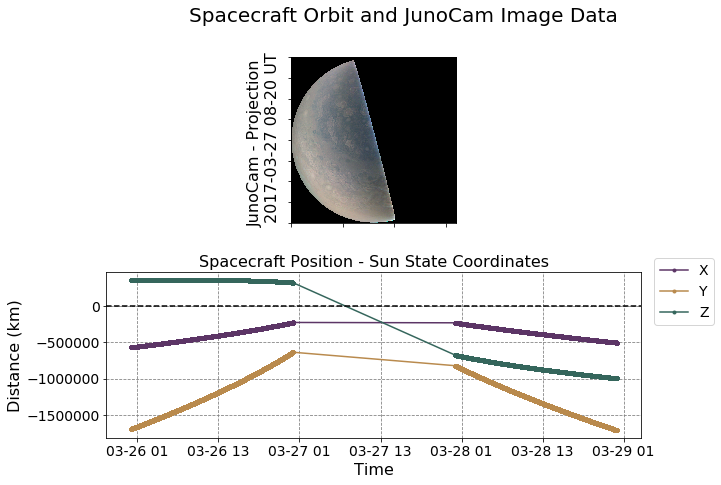

In [12]:
#if we try and plot the spacecraft orbit from this - what would happen? 
#let's try a very simple plot just to see what's going on - 

fig = plt.figure(figsize=(11, 7))
fig.suptitle('Spacecraft Orbit and JunoCam Image Data', fontsize=20)

#set up gridspec
gs = plt.GridSpec(2, 1, hspace = 0.3, wspace = 0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

#plot images data - note for now use imshow to plot out the 3D datasets
#we've seen this before in lab 3
ax1.imshow(imageData['mapprojected'])

#remember to convert datetiem index to pydatetime for plotting

ax2.plot(dataFGM.index.to_pydatetime(), dataFGM['POS_X'], marker = '.', color = '#5c3566', 
         label = 'X')
ax2.plot(dataFGM.index.to_pydatetime(), dataFGM['POS_Y'], marker = '.', color = '#b98a4d', 
         label = 'Y')
ax2.plot(dataFGM.index.to_pydatetime(), dataFGM['POS_Z'], marker = '.', color = '#35665c', 
         label = 'Z')

ax2.axhline(y=0.0, color = 'k', linestyle = '--')
ax2.set_ylabel('Distance (km)', fontsize = 16)
ax2.set_xlabel('Time', fontsize = 16)

ax2.legend(bbox_to_anchor = (1.15, 1.13), prop={'size':14})

#setting labeling
ax1.set_ylabel('JunoCam - Projection \n {:%Y-%m-%d %H-%M} UT'.format(imgTime), fontsize = 16)
ax2.set_title('Spacecraft Position - Sun State Coordinates',   fontsize = 16)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax1.set_yticklabels([]) #make the tick labels

ax2.tick_params(labelsize = 14)
#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')


### What do you think is wrong here with the second plot? 

In [13]:
#
##
###
####
#####
####
###
##
#
##
###
####
#####
####
###
##
#
##
###
####
#####
####
###
##
#


In [14]:
#it would be useful to have this in Jupiter Radii and also to fill in the data frame with
#a clear break between these points no rather than a continuous line? 

#can you find what function to use to do this using the help() command? Which one do you
#think we should use to convert to Jupiter Radii?

help(extfunc)


Help on module externalfunctions:

NAME
    externalfunctions - externalfunctions.py

DESCRIPTION
    Comment Block for modules should have: 
    
    Name and Date: 
    - Written on 1/29/2018 for CLaSP 405 by Lab TA A. Azari. 
    
    Purpose:
    - To create a module with helpful reading file functions and 
    magnetic field data analysis for Lab 4.

FUNCTIONS
    addQuadrature(X, Y, Z)
        Calculates a quadrature sum of three values. 
        Formula as np.sqrt(x^2 + y^2 + z^2)
        Useful when calculating the  magnitude of X, Y, Z vector components.
    
    convertJupiterR(columns)
        Takes in a dataframe subset and converts
        into radii of planet by creating new columns.
    
    readFGM(year, dayOfYear)
        Function to read in Juno Flux Gate Magnetometer (FGM) data. Is 
        essentially a wrapper for read CSV and then manipulation of 
        datetime objects.
    
    readImgFiles(directoryName)
        Takes in a directory path name and then reads a

### Converting to Jupiter Radii

Go ahead and evaulated the next cell and look at the extfunc module to see what this
function is doing. 

In [15]:
#pass in columns to convert
convertedCols = extfunc.convertJupiterR(dataFGM[['POS_X', 'POS_Y', 'POS_Z']])

#create and assign new columns here - 
dataFGM[['POS_X_RJ', 'POS_Y_RJ', 'POS_Z_RJ']] = convertedCols

#take a look 

print(dataFGM[['POS_X_RJ', 'POS_Y_RJ', 'POS_Z_RJ']].head())

                     POS_X_RJ   POS_Y_RJ  POS_Z_RJ
DATETIME                                          
2017-03-26 00:00:01 -7.965509 -23.748952  4.986436
2017-03-26 00:00:02 -7.965469 -23.748827  4.986440
2017-03-26 00:00:03 -7.965425 -23.748689  4.986445
2017-03-26 00:00:04 -7.965381 -23.748551  4.986450
2017-03-26 00:00:05 -7.965337 -23.748413  4.986455


### ReSampling to Adjust for Missing Data

Remember how the mag data had missing values in addition to missing the entire day that our
image was taken? Let's learn some useful effects of having a datetime index here...



In [16]:
#this command resamples our array at the 1S frequency ie it adds in values where there are 
#missing values and fills with NAN

oneSecDataFGM = (dataFGM.resample('1S').asfreq()).copy()
print(len(oneSecDataFGM), (24*3*60*60), len(dataFGM))


259199 259200 172787


In [17]:
#making sure this took hold - 

#print out  values
print(oneSecDataFGM.loc[dt.datetime(2017, 3, 27, 1), :])
print(oneSecDataFGM.loc[dt.datetime(2017, 3, 28, 1), :])



DATETIME    NaN
MSEC        NaN
B_X         NaN
B_Y         NaN
B_Z         NaN
POS_X       NaN
POS_Y       NaN
POS_Z       NaN
POS_X_RJ    NaN
POS_Y_RJ    NaN
POS_Z_RJ    NaN
Name: 2017-03-27 01:00:00, dtype: object
DATETIME    2017 87 1 0 0
MSEC                  459
B_X                 40.43
B_Y                149.95
B_Z                 31.83
POS_X             -241950
POS_Y             -865041
POS_Z             -693729
POS_X_RJ         -3.38429
POS_Y_RJ         -12.0998
POS_Z_RJ         -9.70359
Name: 2017-03-28 01:00:00, dtype: object


## Example Plot of Newly Resampled Data

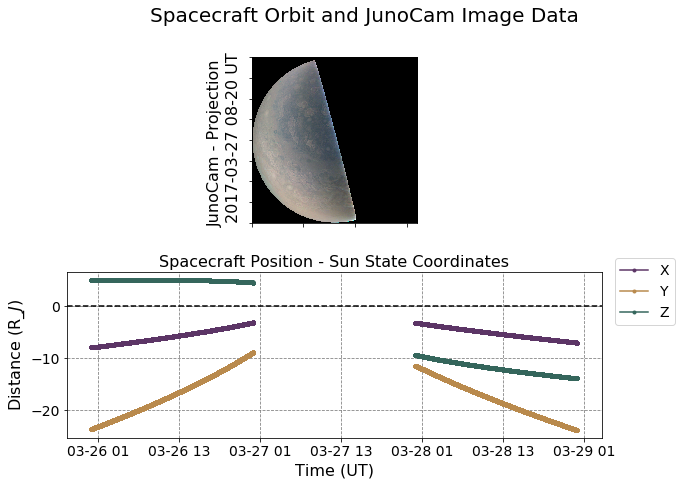

In [18]:
#if we try and plot the spacecraft orbit from this - what would happen? 
#let's try a very simple plot just to see what's going on - 

fig = plt.figure(figsize=(11, 7))
fig.suptitle('Spacecraft Orbit and JunoCam Image Data', fontsize=20)

#set up gridspec
gs = plt.GridSpec(2, 1, hspace = 0.3, wspace = 0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

#plot images data - note for now use imshow to plot out the 3D datasets
#we've seen this before in lab 3
ax1.imshow(imageData['mapprojected'])

#remember to convert datetiem index to pydatetime for plotting


#THIS IS NEW --------------------------------------------------------
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_X_RJ'], marker = '.', 
         color = '#5c3566', label = 'X')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Y_RJ'], marker = '.', 
         color = '#b98a4d', label = 'Y')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Z_RJ'], marker = '.', 
         color = '#35665c', label = 'Z')
#THIS IS NEW --------------------------------------------------------

#set up axhline location
ax2.axhline(y=0.0, color = 'k', linestyle = '--')

ax2.set_ylabel('Distance (R_${J}$)', fontsize = 16)
ax2.set_xlabel('Time (UT)', fontsize = 16)

ax2.legend(bbox_to_anchor = (1.15, 1.13), prop={'size':14})

#setting labeling
ax1.set_ylabel('JunoCam - Projection \n {:%Y-%m-%d %H-%M} UT'.format(imgTime), fontsize = 16)
ax2.set_title('Spacecraft Position - Sun State Coordinates',   fontsize = 16)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax1.set_yticklabels([]) #make the tick labels

ax2.tick_params(labelsize = 14)
#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')

### Notice how the np.nan values in the array or the missing date value are no longer being plotted? Also the distance axis is now in Jupiter radii?

Do we like the time indexing though? 

# Part 4 - Plotting Different Datetime Formatter Objects / Major & Minor Axis

So far we haven't adjusted the auto choice of Python for plotting axis labels. In this section we learn how to accomplish this for both datetime and non-datetime axes. 


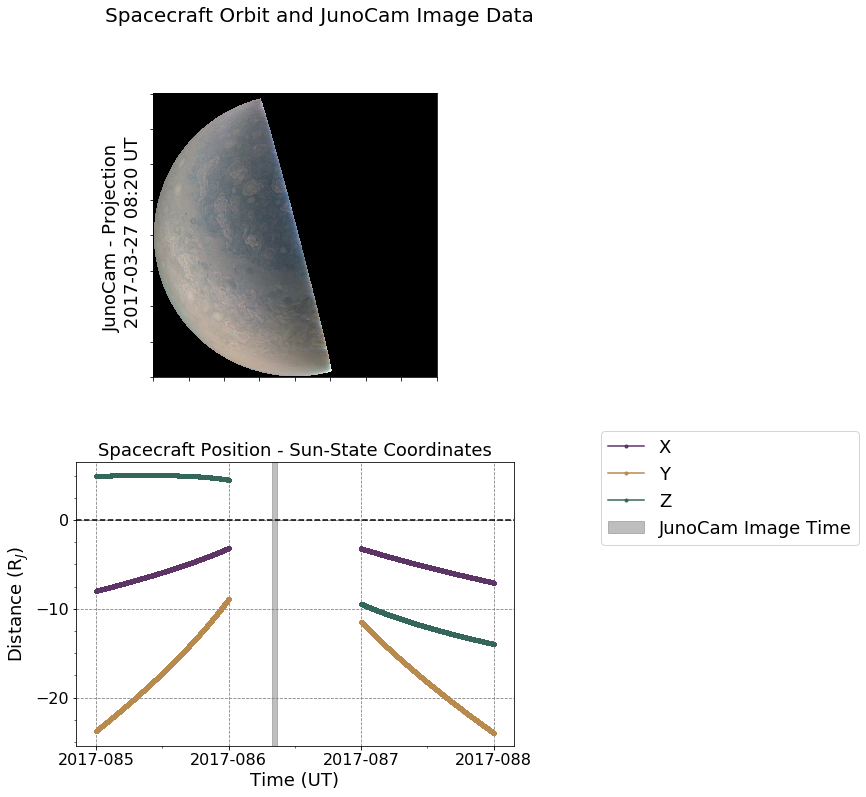

In [19]:
fig = plt.figure(figsize=(9, 12))
fig.suptitle('Spacecraft Orbit and JunoCam Image Data', fontsize=20)

gs = plt.GridSpec(2, 1, hspace = 0.3, wspace = 0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(imageData['mapprojected'])
#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax1.set_yticklabels([]) #make the tick labels


ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_X_RJ'], marker = '.', 
         color = '#5c3566', label = 'X')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Y_RJ'], marker = '.', 
         color = '#b98a4d', label = 'Y')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Z_RJ'], marker = '.', 
         color = '#35665c', label = 'Z')

ax2.axhline(y=0.0, color = 'k', linestyle = '--')
ax2.set_ylabel('Distance (R$_{J}$)', fontsize = 18)

#setting labeling
ax1.set_ylabel('JunoCam - Projection \n {:%Y-%m-%d %H:%M} UT'.format(imgTime), fontsize = 18)
ax2.set_title('Spacecraft Position - Sun-State Coordinates',   fontsize = 18)

ax2.tick_params(labelsize = 16)
#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')

#THIS IS NEW----------------------------------------------------------------

#add vertical line for when image taken
ax2.axvspan(imgTime - dt.timedelta(minutes = 30), imgTime + dt.timedelta(minutes = 30), 
            alpha = 0.5, color ='gray', label = 'JunoCam Image Time')

#This sets a minor locator object every 2.5, and a major one every 10 - it sets up
#the yaxis to have ticks at the minor cadence and labels at the major one
ax2.yaxis.set_minor_locator(MultipleLocator(2.5))
ax2.yaxis.set_major_locator(MultipleLocator(10))

#what about datetime objects? You can do a similar thing with this syntax
ax2.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax2.xaxis.set_major_locator(mdt.DayLocator())

#This is then useful because you can set the format
ax2.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax2.set_xlabel('Time (UT)', fontsize = 18)
ax2.legend(bbox_to_anchor = (1.18, 1.141), prop={'size':18})
#----------------------------------------------------------------

### What do you think about this one? What is the primary difference from the before plots?

# Part 5 - Plotting Magnetic Field Data

Let's go ahead and start plotting the magnetic field data as well. 

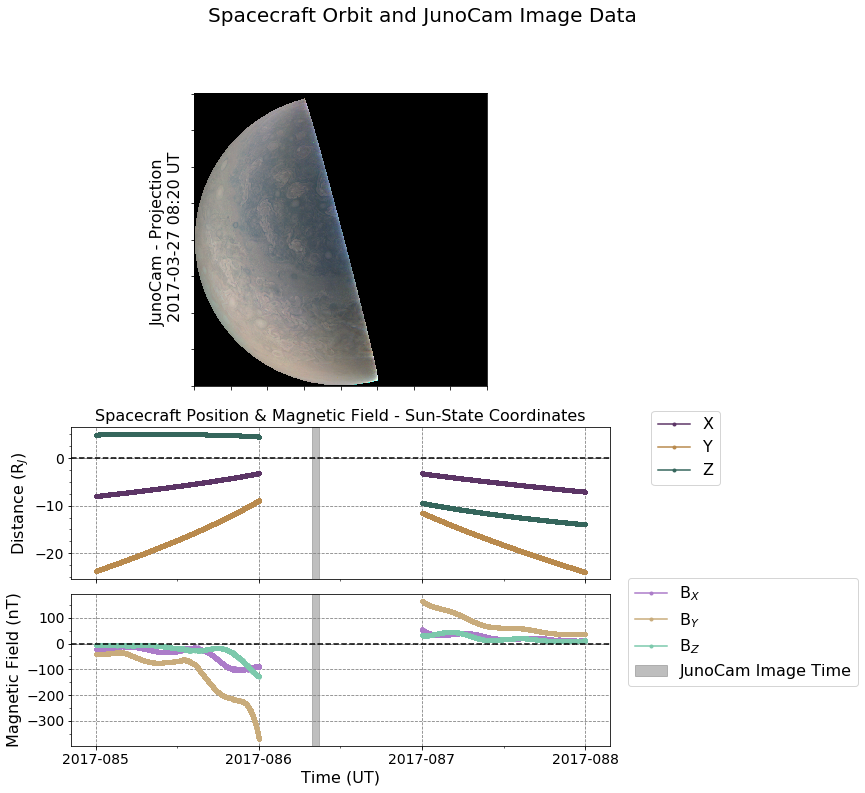

In [20]:
fig = plt.figure(figsize=(13, 12))
fig.suptitle('Spacecraft Orbit and JunoCam Image Data', fontsize=20)

gs_top = plt.GridSpec(4, 1,    hspace = 0.6, wspace = 0.0, right = 0.7)
gs_bottom = plt.GridSpec(4, 1, hspace = 0.1, wspace = 0.0, right = 0.7)

#add subplots
ax1 = fig.add_subplot(gs_top[0:2, :])
ax2 = fig.add_subplot(gs_bottom[2, :])
ax3 = fig.add_subplot(gs_bottom[3, :])

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(imageData['mapprojected'])

ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_X_RJ'], marker = '.', 
         color = '#5c3566', label = 'X')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Y_RJ'], marker = '.', 
         color = '#b98a4d', label = 'Y')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Z_RJ'], marker = '.', 
         color = '#35665c', label = 'Z')

ax2.axhline(y=0.0, color = 'k', linestyle = '--')
ax2.set_ylabel('Distance (R$_{J}$)', fontsize = 16)


#setting labeling
ax1.set_ylabel('JunoCam - Projection \n {:%Y-%m-%d %H:%M} UT'.format(imgTime), fontsize = 16)
ax2.set_title('Spacecraft Position & Magnetic Field - Sun-State Coordinates', fontsize = 16)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax1.set_yticklabels([]) #make the tick labels

ax2.tick_params(labelsize = 14)
#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')
ax2.set_xticklabels([])


ax2.yaxis.set_minor_locator(MultipleLocator(2.5))
#minor will have grid ticks
ax2.yaxis.set_major_locator(MultipleLocator(10))
#major will default to grid AND labels
#behaivor can be programmed


ax3.yaxis.set_minor_locator(MultipleLocator(50))
#minor will have grid ticks
ax3.yaxis.set_major_locator(MultipleLocator(100))
#major will default to grid AND labels
#behaivor can be programmed

ax2.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax2.xaxis.set_major_locator(mdt.DayLocator())

ax3.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax3.xaxis.set_major_locator(mdt.DayLocator())
#SET FORMAT
ax3.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))

#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')

ax2.axvspan(imgTime - dt.timedelta(minutes = 30), imgTime + dt.timedelta(minutes = 30), 
            alpha = 0.5, color ='gray')
ax3.axvspan(imgTime - dt.timedelta(minutes = 30), imgTime + dt.timedelta(minutes = 30), 
            alpha = 0.5, color ='gray', label = 'JunoCam Image Time')

ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_X'], marker = '.', 
         color = '#ac7cc9', label = 'B$_{X}$')
ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Y'], marker = '.', 
         color = '#c9ac7c', label = 'B$_{Y}$')
ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Z'], marker = '.', 
         color = '#7cc9ac', label = 'B$_{Z}$')

ax3.axhline(y=0.0, color = 'k', linestyle = '--')
ax3.set_ylabel('Magnetic Field (nT)', fontsize = 16)
ax3.set_xlabel('Time (UT)', fontsize = 16)

ax2.legend(bbox_to_anchor = (1.22, 1.16), prop={'size':16})
ax3.legend(bbox_to_anchor = (1.02, 1.16), prop={'size':16})

ax3.tick_params(labelsize = 14)
#set up the grid
ax3.grid(color = 'gray', linestyle = 'dashed')

### What do we think of this plot? Would it be useful to have the orbit as a non-line plot? What axis should we represent? X, Y, Z? All of them? 


### Plotting with Orbital Trajectory 

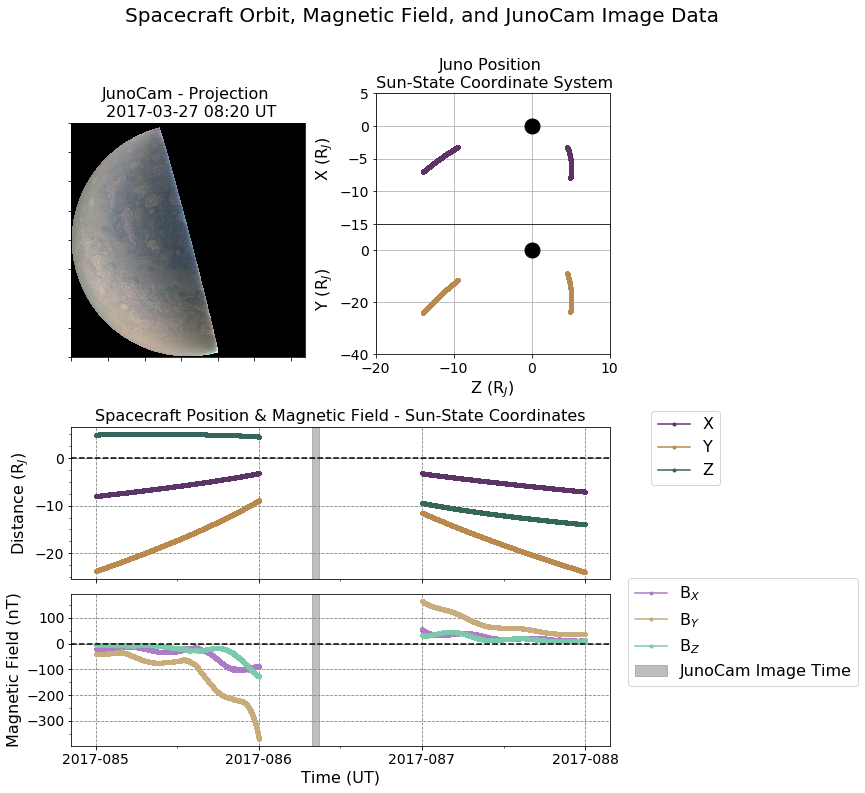

In [21]:
fig = plt.figure(figsize=(13, 12))
fig.suptitle('Spacecraft Orbit, Magnetic Field, and JunoCam Image Data', fontsize=20)

gs_top    = plt.GridSpec(4,    2, hspace = 0.6, wspace = 0.3, right = 0.7)
gs_bottom = plt.GridSpec(4,    1, hspace = 0.1, wspace = 0.0, right = 0.7)
gs_side   = plt.GridSpec(5,    2, hspace = 0.0, wspace = 0.3, right = 0.7)

#add subplots
ax1 = fig.add_subplot(gs_top[0:2, 0])
ax2 = fig.add_subplot(gs_bottom[2, :])
ax3 = fig.add_subplot(gs_bottom[3, :])
ax4 = fig.add_subplot(gs_side[0, 1])
ax5 = fig.add_subplot(gs_side[1, 1])

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(imageData['mapprojected'])

ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_X_RJ'], marker = '.', 
         color = '#5c3566', label = 'X')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Y_RJ'], marker = '.', 
         color = '#b98a4d', label = 'Y')
ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['POS_Z_RJ'], marker = '.', 
         color = '#35665c', label = 'Z')

ax2.axhline(y=0.0, color = 'k', linestyle = '--')
ax2.set_ylabel('Distance (R$_{J}$)', fontsize = 16)


#setting labeling
ax1.set_title('JunoCam - Projection \n {:%Y-%m-%d %H:%M} UT'.format(imgTime),   fontsize = 16)
ax2.set_title('Spacecraft Position & Magnetic Field - Sun-State Coordinates', fontsize = 16)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax1.set_yticklabels([]) #make the tick labels

ax2.tick_params(labelsize = 14)
#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')
ax2.set_xticklabels([])


ax2.yaxis.set_minor_locator(MultipleLocator(2.5))
#minor will have grid ticks
ax2.yaxis.set_major_locator(MultipleLocator(10))
#major will default to grid AND labels
#behaivor can be programmed


ax3.yaxis.set_minor_locator(MultipleLocator(50))
#minor will have grid ticks
ax3.yaxis.set_major_locator(MultipleLocator(100))
#major will default to grid AND labels
#behaivor can be programme



#what about datetime objects?

ax2.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax2.xaxis.set_major_locator(mdt.DayLocator())

ax3.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax3.xaxis.set_major_locator(mdt.DayLocator())
#SET FORMAT
ax3.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax3.set_xlabel('Time (UT)', fontsize = 18)

#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')

ax2.axvspan(imgTime - dt.timedelta(minutes = 30), imgTime + dt.timedelta(minutes = 30), 
            alpha = 0.5, color ='gray')
ax3.axvspan(imgTime - dt.timedelta(minutes = 30), imgTime + dt.timedelta(minutes = 30), 
            alpha = 0.5, color ='gray', label = 'JunoCam Image Time')

ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_X'], marker = '.', 
         color = '#ac7cc9', label = 'B$_{X}$')
ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Y'], marker = '.', 
         color = '#c9ac7c', label = 'B$_{Y}$')
ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Z'], marker = '.', 
         color = '#7cc9ac', label = 'B$_{Z}$')

ax4.plot(oneSecDataFGM['POS_Z_RJ'], oneSecDataFGM['POS_X_RJ'], marker = '.', 
         color = '#5c3566')
ax5.plot(oneSecDataFGM['POS_Z_RJ'], oneSecDataFGM['POS_Y_RJ'], marker = '.', 
         color = '#b98a4d')

#x-values
#plot out location of Saturn
ax4.set_title('Juno Position \n Sun-State Coordinate System', fontsize = 16)
ax4.plot([0], [0], color='k', marker = 'o',  markersize = 15)
ax5.plot([0], [0], color='k', marker = 'o',  markersize = 15)

ax4.set_ylim([-15, 5])
ax5.set_ylim([-40, 10])

ax4.set_xticklabels([])

ax4.set_xlim([-20, 10])
ax5.set_xlim([-20, 10])

ax4.grid()
ax5.grid()

ax4.tick_params(labelsize = 14)
ax5.tick_params(labelsize = 14)

ax4.set_ylabel('X (R$_{J}$)', fontsize = 16)
ax5.set_xlabel('Z (R$_{J}$)', fontsize = 16)
ax5.set_ylabel('Y (R$_{J}$)', fontsize = 16)


ax3.axhline(y=0.0, color = 'k', linestyle = '--')
ax3.set_ylabel('Magnetic Field (nT)', fontsize = 16)
ax3.set_xlabel('Time (UT)', fontsize = 16)

ax2.legend(bbox_to_anchor = (1.22, 1.16), prop={'size':16})
ax3.legend(bbox_to_anchor = (1.02, 1.16), prop={'size':16})

ax3.tick_params(labelsize = 14)
#set up the grid
ax3.grid(color = 'gray', linestyle = 'dashed')

# Part 6 - Plotting the Magnitude and the Error

Go ahead and check out the external function file again - if we want to calculate the magnitude of B is there a function that's useful in there? 


In [22]:


























#Calculate the magntitude of vector

#B_mag =  adding in quadrature (sqrt(Bx^2 + By^2 + Bz^2))
magnitude = extfunc.addQuadrature(oneSecDataFGM['B_X'], 
                             oneSecDataFGM['B_Y'], oneSecDataFGM['B_Z'])

oneSecDataFGM['B_MAG'] = magnitude

### Calculating the Error - 

What if we want the error on the magnitude? In reality the resolution of the Juno FGM is +/- 0.05 nT for measurements under 1600 nT. If we try and look at that error, it won't show on the plot. This is part of the reason the error wasn't in the file we downloaded. https://link.springer.com/article/10.1007/s11214-017-0334-z

For the purpose of this lab, let's assume the resolution is +/- 50 nT. By using rule 3.47 the error of a function of several variables we are able to do this - the error function is as follows:

$$\delta{q} = \sqrt{\Bigl(\frac{\partial q}{\partial x}\delta{x}\Bigl)^2 + 
            \Bigl(\frac{\partial q}{\partial y}\delta{y}\Bigl)^2 + 
            \Bigl(\frac{\partial q}{\partial z}\delta{z}\Bigl)^2}$$

In this particular case, each component is as follows by taking the partial derivative.

$$\Bigl(\frac{\partial q}{\partial x} \Bigl) = \frac{B_{x}}{\lvert B \rvert}$$

... and similarly for y and z

$$\Bigl(\frac{\partial q}{\partial y} \Bigl) = \frac{B_{y}}{\lvert B \rvert},  \Bigl(\frac{\partial q}{\partial z} \Bigl) = \frac{B_{z}}{\lvert B \rvert}$$

Let's now calculate each respective piece and then again use our extfunc module to add in quadrature.

In [23]:
#note the resolution is adjusted to a larger quantity for the sole purpose of this lab - 

resolution = 50.0 #nT

errorX = (oneSecDataFGM['B_X'] / oneSecDataFGM['B_MAG']) * resolution
errorY = (oneSecDataFGM['B_Y'] / oneSecDataFGM['B_MAG']) * resolution
errorZ = (oneSecDataFGM['B_Z'] / oneSecDataFGM['B_MAG']) * resolution

magnitudeError = extfunc.addQuadrature(errorX, errorY, errorZ)

oneSecDataFGM['B_MAG_ERROR'] = magnitudeError
#and now what? Lets go ahead and plot again with error


### Magnetic Field Plot with Error

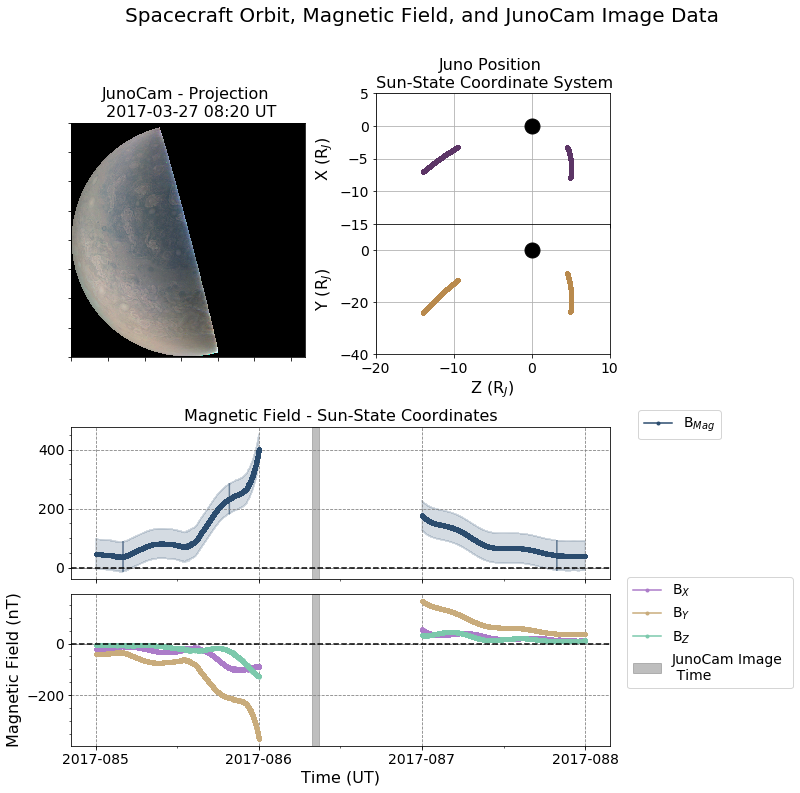

In [24]:
fig = plt.figure(figsize=(13, 12))
fig.suptitle('Spacecraft Orbit, Magnetic Field, and JunoCam Image Data', fontsize=20)

gs_top    = plt.GridSpec(4,    2, hspace = 0.6, wspace = 0.3, right = 0.7)
gs_bottom = plt.GridSpec(4,    1, hspace = 0.1, wspace = 0.0, right = 0.7)
gs_side   = plt.GridSpec(5,    2, hspace = 0.0, wspace = 0.3, right = 0.7)

#add subplots
ax1 = fig.add_subplot(gs_top[0:2, 0])
ax2 = fig.add_subplot(gs_bottom[2, :])
ax3 = fig.add_subplot(gs_bottom[3, :])
ax4 = fig.add_subplot(gs_side[0, 1])
ax5 = fig.add_subplot(gs_side[1, 1])

#plot images data - note for now use imshow to plot out the 3D datasets
ax1.imshow(imageData['mapprojected'])

ax2.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_MAG'], marker = '.', 
         color = '#2b4c6e', label = 'B$_{Mag}$')

ax2.fill_between(oneSecDataFGM.index.to_pydatetime(), 
                 oneSecDataFGM['B_MAG'] - oneSecDataFGM['B_MAG_ERROR'], 
                 oneSecDataFGM['B_MAG_ERROR'] + oneSecDataFGM['B_MAG'], alpha = 0.2, 
                 color = '#2b4c6e')

ax2.axhline(y=0.0, color = 'k', linestyle = '--')



#setting labeling
ax1.set_title('JunoCam - Projection \n {:%Y-%m-%d %H:%M} UT'.format(imgTime),  fontsize = 16)
ax2.set_title('Magnetic Field - Sun-State Coordinates', fontsize = 16)

#setting tick parameters to null - these are just pixel values so in this case, not
#incredibly informative
ax1.set_xticklabels([]) #make the tick labels
ax1.set_yticklabels([]) #make the tick labels

ax2.tick_params(labelsize = 14)
#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')
ax2.set_xticklabels([])


ax2.yaxis.set_minor_locator(MultipleLocator(50))
#minor will have grid ticks
ax2.yaxis.set_major_locator(MultipleLocator(200))
#major will default to grid AND labels
#behaivor can be programmed


ax3.yaxis.set_minor_locator(MultipleLocator(50))
#minor will have grid ticks
ax3.yaxis.set_major_locator(MultipleLocator(200))

ax2.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax2.xaxis.set_major_locator(mdt.DayLocator())

ax3.xaxis.set_minor_locator(mdt.HourLocator(np.arange(0, 24, 12)))
ax3.xaxis.set_major_locator(mdt.DayLocator())

#SET FORMAT
ax3.xaxis.set_major_formatter(mdt.DateFormatter('%Y-%j'))
ax3.set_xlabel('Time (UT)', fontsize = 18)

#set up the grid
ax2.grid(color = 'gray', linestyle = 'dashed')

ax2.axvspan(imgTime - dt.timedelta(minutes = 30), imgTime + dt.timedelta(minutes = 30), 
            alpha = 0.5, color ='gray')
ax3.axvspan(imgTime - dt.timedelta(minutes = 30), imgTime + dt.timedelta(minutes = 30), 
            alpha = 0.5, color ='gray', label = 'JunoCam Image \n Time')


ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_X'], marker = '.', 
         color = '#ac7cc9', label = 'B$_{X}$')
ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Y'], marker = '.', 
         color = '#c9ac7c', label = 'B$_{Y}$')
ax3.plot(oneSecDataFGM.index.to_pydatetime(), oneSecDataFGM['B_Z'], marker = '.', 
         color = '#7cc9ac', label = 'B$_{Z}$')

ax4.plot(oneSecDataFGM['POS_Z_RJ'], oneSecDataFGM['POS_X_RJ'], marker = '.', 
         color = '#5c3566')
ax5.plot(oneSecDataFGM['POS_Z_RJ'], oneSecDataFGM['POS_Y_RJ'], marker = '.', 
         color = '#b98a4d')

#x-values
#plot out location of Saturn
ax4.set_title('Juno Position \n Sun-State Coordinate System', fontsize = 16)
ax4.plot([0], [0], color='k', marker = 'o',  markersize = 15)
ax5.plot([0], [0], color='k', marker = 'o',  markersize = 15)

ax4.set_ylim([-15, 5])
ax5.set_ylim([-40, 10])

ax4.set_xticklabels([])

ax4.set_xlim([-20, 10])
ax5.set_xlim([-20, 10])

ax4.grid()
ax5.grid()

ax4.tick_params(labelsize = 14)
ax5.tick_params(labelsize = 14)

ax4.set_ylabel('X (R$_{J}$)', fontsize = 16)
ax5.set_xlabel('Z (R$_{J}$)', fontsize = 16)
ax5.set_ylabel('Y (R$_{J}$)', fontsize = 16)


ax3.axhline(y=0.0, color = 'k', linestyle = '--')
ax3.set_ylabel('Magnetic Field (nT)', fontsize = 16)
ax3.set_xlabel('Time (UT)', fontsize = 16)


ax2.legend(bbox_to_anchor = (1.22, 1.16), prop={'size':14})
ax3.legend(bbox_to_anchor = (1.02, 1.16), prop={'size':14})

ax3.tick_params(labelsize = 14)
#set up the grid
ax3.grid(color = 'gray', linestyle = 'dashed')

#savefigure
plt.savefig('./Figures/JunoCam_MagData_{:%Y-%j-%H-%M}.png'.format(imgTime))

In future labs we will learn how to move the axis label through annotation so as to not leave axes unlabeled. For now you can either double label or sinlge label in redundant cases.

What do you think the sripes are in the error for the magnitude of B plot? Also in this case did it make sense to do the full error calculation? 

# SUMMARY

From this lab you have learned the basics magnetic field vector analysis and merging error analysis into Python plots. Additionally you have learned about self written modules. 

Homework: 
- Please complete homework 4 located in the file folder - due in 1.5 weeks on Friday the 9th. 
- Reminder - office hours for this will be held on Thursdays and the third lab report is due THIS Friday the 2nd. 

This homework should take no more than 4-5 hours. This is the beginning of more serious coding with external modules, be sure to start early in case you run into logistical issues. 
